In [18]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [5]:
inputFileName = 'etnews.kr_facebook_4차 산업혁명'
data = json.loads(open(inputFileName + '.Json', 'r', encoding='utf-8').read())
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [6]:
message = ''

for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message']) + ''
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [8]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

In [9]:
count = Counter(message_N)
count

Counter({'차': 23,
         '산업혁명': 22,
         '전자신문': 13,
         '산업': 10,
         '직업': 10,
         '기술': 8,
         '시대': 7,
         '라이브': 7,
         '이번': 6,
         '진흥': 6,
         '포럼': 5,
         '위': 5,
         '일자리': 5,
         '창': 5,
         '조직': 4,
         '터': 4,
         '통해': 4,
         '진행': 4,
         '스파크': 3,
         '미래': 3,
         '변화': 3,
         '사회': 3,
         '기업': 3,
         '로봇': 3,
         '등': 3,
         '노력': 3,
         '서울': 3,
         '시간': 3,
         '방송': 3,
         '대응': 3,
         '주형': 3,
         '철': 3,
         '전자': 3,
         '정보': 3,
         '이슈': 2,
         '소셜': 2,
         '우리': 2,
         '위해': 2,
         '사례': 2,
         '주요': 2,
         '국내': 2,
         '활용': 2,
         '과정': 2,
         '빅데이터': 2,
         '흐름': 2,
         '최고': 2,
         '서비스': 2,
         '영국': 2,
         '한국': 2,
         '경쟁력': 2,
         '제': 2,
         '를': 2,
         '교육': 2,
         '강': 2,
         '만구': 2,
   

In [11]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


In [16]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

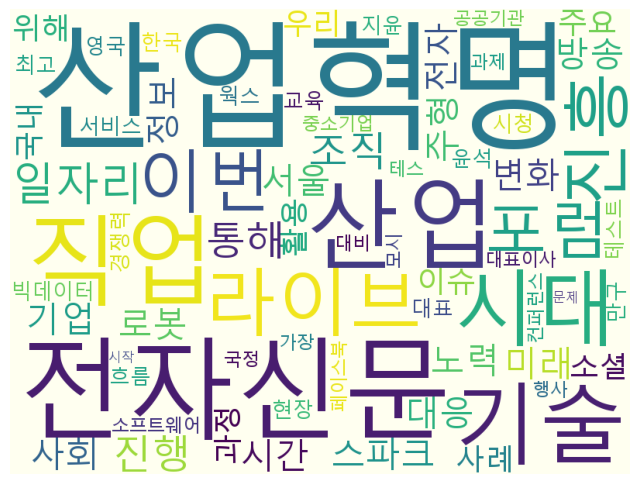

In [19]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud) #원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림
plt.axis('off') #X축, Y축 지우기
plt.show()

In [20]:
import pandas as pd
CB = pd.read_csv('CoffeeBean.csv', encoding='CP949', index_col=0, header=0, engine='python')
CB.head()

,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
2,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
3,강남에스점,서울시 서초구 서초 1306-3호,02-593-5095
4,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052


In [23]:
addr = []

for address in CB.address:
    addr.append(str(address).split())

#작업 내용 확인용 출력
print('데이터 개수 : %d' % len(addr))
addr

데이터 개수 : 246


[['서울시', '강남구', '학동로', '211', '1층'],
 ['서울시', '강남구', '논현로', '566', '강남차병원1층'],
 ['서울시', '서초구', '강남대로', '369', '1층'],
 ['서울시', '서초구', '서초', '1306-3호'],
 ['서울시', '강남구', '압구정로', '461', '네이처포엠빌딩B108,109호'],
 ['서울시', '강남구', '도산대로', '126'],
 ['서울시', '강남구', '논현로', '842', '압구정빌딩1층'],
 ['서울시', '강남구', '논현로', '512', '지상1,2층'],
 ['서울시', '서초구', '강남대로', '213', '24호', '지하1층'],
 ['서울시', '강남구', '삼성로', '716', 'LEE76빌딩2층'],
 ['서울', '서초구', '반포동', '736-17', 'P빌딩', '2층'],
 ['서울시', '강남구', '언주로', '30길', '10,112', '현대비젼21', '112호'],
 ['서울시', '강남구', '선릉로', '749', '1,2층'],
 ['서울시', '강남구', '도산대로49길', '13', '1층', '17,18호'],
 ['서울시', '강남구', '선릉로', '157길', '12', '석전빌딩', '1~4층'],
 ['서울시', '서초구', '강남대로', '51길', '1', '511', 'TOWER', '1층'],
 ['서울시', '강남구', '논현', '231-13호', '팍스타워지하1층'],
 ['서울', '강남구', '영동대로', '513', '컨벤션별관A동', '지하', '2층'],
 ['서울시', '강남구', '영동대로', '511', '트레이드타워', '지하1층'],
 ['서울시', '강남구', '영동대로', '607', '1,2층'],
 ['서울시', '서초구', '신반포로', '23', '1141호', '엘루체백화점내1층1013~1015호'],
 ['서울시', '송파구', '석촌호수로', '118',

In [25]:
addr2=[]

for i in range(len(addr)):
    if addr[i][0] == "서울": addr[i][0] = "서울특별시"
    elif addr[i][0] == "서울시": addr[i][0] = "서울특별시"
    elif addr[i][0] == "부산시": addr[i][0] = "부산광역시"
    elif addr[i][0] == "인천": addr[i][0] = "인천광역시"
    elif addr[i][0] == "광주": addr[i][0] = "광주광역시"
    elif addr[i][0] == "대전시": addr[i][0] = "대전광역시"
    elif addr[i][0] == "울산시": addr[i][0] = "울산광역시"
    elif addr[i][0] == "세종시": addr[i][0] = "세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0] = "경기도"
    elif addr[i][0] == "충북": addr[i][0] = "충청북도"
    elif addr[i][0] == "충남": addr[i][0] = "충청남도"
    elif addr[i][0] == "전북": addr[i][0] = "전라북도"
    elif addr[i][0] == "전남": addr[i][0] = "전라남도"
    elif addr[i][0] == "경북": addr[i][0] = "경상북도"
    elif addr[i][0] == "경남": addr[i][0] = "경상남도"
    elif addr[i][0] == "제주": addr[i][0] = "제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0] = "제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0] = "제주특별자치도"

    addr2.append(' '.join(addr[i]))

addr2 #작업 내용 확인용 출력

['서울특별시 강남구 학동로 211 1층',
 '서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울특별시 서초구 서초 1306-3호',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 842 압구정빌딩1층',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울특별시 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울특별시 강남구 영동대로 513 컨벤션별관A동 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 1,2층',
 '서울특별시 서초구 신반포로 23 1141호 엘루체백화점내1층1013~1015호',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서울특별시 서초구 서초대로74길 11 지하2층',
 '서울특별시 서초구 서초대로74길 4 삼성생명보험서초타워내지하1층',
 '서울특별시 서초구 방배중앙로 187',
 '서울특별시 강남구 테헤란로 20길 10 쓰리엠타워1층',
 '서울특별시 강남구 테헤란로 70길 12 1층',
 '서울특별시 강남구 봉은사로 628 엘슨빌딩1층',
 '서울특별시 송파구 오금로 11길 7',
 '서울특별시 강

In [26]:
addr2 = pd.DataFrame(addr2, columns=['address2'])

addr2 #직압 내용 확인용 출력

,address2
0,서울특별시 강남구 학동로 211 1층
1,서울특별시 강남구 논현로 566 강남차병원1층
2,서울특별시 서초구 강남대로 369 1층
3,서울특별시 서초구 서초 1306-3호
4,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호"
...,...
241,경상남도 진주시 충의로 19 LH진주사옥 공감동 1층
242,서울특별시 중구 을지로 66 하나은행 명동사옥 1층
243,제주특별자치도 제주시 애월읍 애월해안로 560
244,서울특별시 종로구 성균관로 25-2 성균관대학교 법학관 B2


In [27]:
CB2 = pd.concat([CB, addr2], axis = 1)
CB2.head() 

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
2,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
3,강남에스점,서울시 서초구 서초 1306-3호,02-593-5095,서울특별시 서초구 서초 1306-3호
4,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호"


In [28]:
CB2.to_csv('CoffeeBean_2.csv', encoding='CP949', index=False)

In [29]:
import folium

In [32]:
map_osm = folium.Map(location=[37.5599283, 126.9753632], zoom_start=15)

In [33]:
map_osm.save('map.html')

In [34]:
CB_file = pd.read_csv('CoffeeBean_2.csv', encoding='cp949', engine='python')
CB_file.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
2,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
3,강남에스점,서울시 서초구 서초 1306-3호,02-593-5095,서울특별시 서초구 서초 1306-3호
4,청담에스점,"서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호",02-548-6052,"서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호"


In [42]:
CB_geoData = pd.read_csv('CoffeeBean_2_add.csv', encoding='cp949', engine='python')
len(CB_geoData)

246

In [43]:
map_CB = folium.Map(location=[37.5599283, 126.9753632], zoom_start=15)

In [46]:
for i, store in CB_geoData.iterrows():
    folium.Marker(location=[store['Y'], store['X']], popup=store['store'],
                   icon=folium.Icon(color='red', icon='star')).add_to(map_CB)

In [47]:
map_CB.save('map_CB.html')

In [48]:
import webbrowser
webbrowser.open('map_CB.html')

True

In [49]:
import pandas as pd

data=pd.read_csv("seoul-metro-2020.logs.csv")

data

,timestamp,station_code,people_in,people_out
0,2020-01-01T05:00:00.000+09:00,150,356,235
1,2020-01-01T06:00:00.000+09:00,150,280,952
2,2020-01-01T07:00:00.000+09:00,150,313,828
3,2020-01-01T08:00:00.000+09:00,150,774,1043
4,2020-01-01T09:00:00.000+09:00,150,923,1694
...,...,...,...,...
2022795,2020-12-31T20:00:00.000+09:00,2827,86,71
2022796,2020-12-31T21:00:00.000+09:00,2827,112,99
2022797,2020-12-31T22:00:00.000+09:00,2827,45,39
2022798,2020-12-31T23:00:00.000+09:00,2827,6,25


In [50]:
station_info = pd.read_csv("seoul-metro-station-info.csv")

station_info

,station.code,station.fr_code,line.num,line.name,line.name_sub,line.station_seq,station.name_full,station.name,station.name_chc,station.name_chn,station.name_en,station.name_jp,geo.latitude,geo.longitude,geo.sigungu_code,geo.sigungu_name,geo.addres_road,geo.address_land,geo.phone
0,158,124,1,1호선,지하철1호선,1,청량리(서울시립대입구),청량리|서울시립대입구,祭基洞,祭基洞,Jegidong,チェギドン,37.580178,127.046835,11060,동대문구,서울특별시 동대문구 왕산로 지하205(전농동),서울특별시 동대문구 전농동 620-69 청량리역(1호선),02-6110-1241
1,157,125,1,1호선,지하철1호선,2,제기동,제기동,新設洞,新设洞,Sinseoldong,シンソルトン,37.578103,127.034893,11060,동대문구,서울특별시 동대문구 왕산로 지하93(제기동),서울특별시 동대문구 제기동 65 제기동역(1호선),02-6110-1251
2,156,126,1,1호선,지하철1호선,3,신설동,신설동,東廟앞,东庙,Dongmyo,トンミョアプ,37.575297,127.025087,11060,동대문구,서울특별시 동대문구 왕산로 지하1(신설동),서울특별시 동대문구 신설동 76-5 신설동역(1호선),02-6110-1261
3,159,127,1,1호선,지하철1호선,4,동묘앞,동묘앞,淸凉里(서울市立大入口),清凉里(首尔市立大学),Cheongnyangni(University of Seoul),チョンニャンニ,37.572627,127.016429,11010,종로구,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),02-6110-1271
4,155,128,1,1호선,지하철1호선,5,동대문,동대문,東大門,东大门,Dongdaemun,トンデムン,37.571420,127.009745,11010,종로구,서울특별시 종로구 종로 지하302(창신동),서울특별시 종로구 창신동 492-1 동대문역(1호선),02-6110-1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2823,823,8,8호선,지하철8호선,14,남한산성입구(성남법원.검찰청),남한산성입구|성남법원|검찰청,南漢山城入口(城南法院檢察廳),南汉山城(城南法院·检察厅),Namhansanseong(Seongnam Court & Prosecutors' O...,ナムハンサンソンイック,37.451535,127.159816,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하445(단대동),경기도 성남시 수정구 단대동 96 남한산성입구역(8호선),02-6311-8231
281,2824,824,8,8호선,지하철8호선,15,단대오거리,단대오거리,丹垈오거리,丹垈五岔路口,Dandaeogeori,タンデオゴリ,37.445210,127.156866,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하365(신흥동),경기도 성남시 수정구 신흥동 2467 단대오거리역(8호선),02-6311-8241
282,2825,825,8,8호선,지하철8호선,16,신흥,신흥,新興,新兴,Sinheung,シンフン,37.440918,127.147564,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하280(신흥동),경기도 성남시 수정구 신흥동 2467 신흥역(8호선),02-6311-8251
283,2826,826,8,8호선,지하철8호선,17,수진,수진,壽進,寿进,Sujin,スジン,37.437428,127.140722,31021,성남시수정구,경기도 성남시 수정구 산성대로 지하200(수진동),경기도 성남시 수정구 수진동 2205-1 수진역(8호선),02-6311-8261


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022800 entries, 0 to 2022799
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 61.7+ MB


In [53]:
station_sum = data.groupby("station_code").sum()

station_sum

,timestamp,people_in,people_out
station_code,,,
150,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,12953773,12300397
151,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,6089772,6136935
152,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,10620727,10336642
153,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,8122680,7618514
154,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,6713475,6737470
...,...,...,...
2823,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,4039675,3655715
2824,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,3064607,2909492
2825,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,1400625,1494727


In [54]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station.code       285 non-null    int64  
 1   station.fr_code    285 non-null    object 
 2   line.num           285 non-null    int64  
 3   line.name          285 non-null    object 
 4   line.name_sub      285 non-null    object 
 5   line.station_seq   285 non-null    int64  
 6   station.name_full  285 non-null    object 
 7   station.name       285 non-null    object 
 8   station.name_chc   285 non-null    object 
 9   station.name_chn   285 non-null    object 
 10  station.name_en    285 non-null    object 
 11  station.name_jp    285 non-null    object 
 12  geo.latitude       285 non-null    float64
 13  geo.longitude      285 non-null    float64
 14  geo.sigungu_code   285 non-null    int64  
 15  geo.sigungu_name   285 non-null    object 
 16  geo.addres_road    285 non

In [55]:
station_info = station_info[['station.code', 'geo.latitude', 'geo.longitude']]

station_info

,station.code,geo.latitude,geo.longitude
0,158,37.580178,127.046835
1,157,37.578103,127.034893
2,156,37.575297,127.025087
3,159,37.572627,127.016429
4,155,37.571420,127.009745
...,...,...,...
280,2823,37.451535,127.159816
281,2824,37.445210,127.156866
282,2825,37.440918,127.147564
283,2826,37.437428,127.140722


In [56]:
station_info = station_info.set_index('station.code')
station_info

,geo.latitude,geo.longitude
station.code,,
158,37.580178,127.046835
157,37.578103,127.034893
156,37.575297,127.025087
159,37.572627,127.016429
155,37.571420,127.009745
...,...,...
2823,37.451535,127.159816
2824,37.445210,127.156866
2825,37.440918,127.147564


In [58]:
joined_data = station_sum.join(station_info)

joined_data = joined_data.dropna()
joined_data

,timestamp,people_in,people_out,geo.latitude,geo.longitude
station_code,,,,,
150,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,12953773,12300397,37.554648,126.972559
151,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,6089772,6136935,37.564718,126.977108
152,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,10620727,10336642,37.570161,126.982923
153,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,8122680,7618514,37.571607,126.991806
154,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,6713475,6737470,37.570926,127.001849
...,...,...,...,...,...
2823,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,4039675,3655715,37.451535,127.159816
2824,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,3064607,2909492,37.445210,127.156866
2825,2020-01-01T05:00:00.000+09:002020-01-01T06:00:...,1400625,1494727,37.440918,127.147564


In [67]:
import folium
seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)
seoul_in

In [68]:
from folium.plugins import HeatMap
HeatMap(data = joined_data[['geo.latitude', 'geo.longitude', 'people_in']]).add_to(seoul_in)
seoul_in

In [69]:
seoul_out = folium.Map(location=[37.55, 126.98], zoom_start=12)
HeatMap(data = joined_data[['geo.latitude', 'geo.longitude', 'people_out']]).add_to(seoul_out)
seoul_out

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022800 entries, 0 to 2022799
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   station_code  int64 
 2   people_in     int64 
 3   people_out    int64 
dtypes: int64(3), object(1)
memory usage: 61.7+ MB


In [84]:
morning_data = data[pd.to_datetime(data.timestamp).dt.hour < 9]
morning_data

,timestamp,station_code,people_in,people_out
0,2020-01-01T05:00:00.000+09:00,150,356,235
1,2020-01-01T06:00:00.000+09:00,150,280,952
2,2020-01-01T07:00:00.000+09:00,150,313,828
3,2020-01-01T08:00:00.000+09:00,150,774,1043
19,2020-01-02T00:00:00.000+09:00,150,25,77
...,...,...,...,...
2022780,2020-12-31T05:00:00.000+09:00,2827,49,15
2022781,2020-12-31T06:00:00.000+09:00,2827,88,59
2022782,2020-12-31T07:00:00.000+09:00,2827,246,111
2022783,2020-12-31T08:00:00.000+09:00,2827,314,181


In [87]:
evening_data = data[pd.to_datetime(data.timestamp).dt.hour > 17]
evening_data

,timestamp,station_code,people_in,people_out
13,2020-01-01T18:00:00.000+09:00,150,3002,1922
14,2020-01-01T19:00:00.000+09:00,150,2857,1696
15,2020-01-01T20:00:00.000+09:00,150,2311,1620
16,2020-01-01T21:00:00.000+09:00,150,2523,1181
17,2020-01-01T22:00:00.000+09:00,150,1830,768
...,...,...,...,...
2022794,2020-12-31T19:00:00.000+09:00,2827,140,162
2022795,2020-12-31T20:00:00.000+09:00,2827,86,71
2022796,2020-12-31T21:00:00.000+09:00,2827,112,99
2022797,2020-12-31T22:00:00.000+09:00,2827,45,39


In [88]:
morning_joined_data=morning_station_sum.join(station_info)
evening_joined_data=evening_station_sum.join(station_info)
morning_joined_data=morning_joined_data.dropna()
evening_joined_data=evening_joined_data.dropna()


NameError: name 'morning_station_sum' is not defined

In [ ]:
morning_seoul_in = folium.Map(location=[37.55, 126.98], zoom_start=12)
